In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Sigmoid 


In [9]:
## Quickly define the sigmoid function
def sigmoid(x):
    """Sigmoid function"""
    return 1.0 / (1.0 + np.exp(-x))

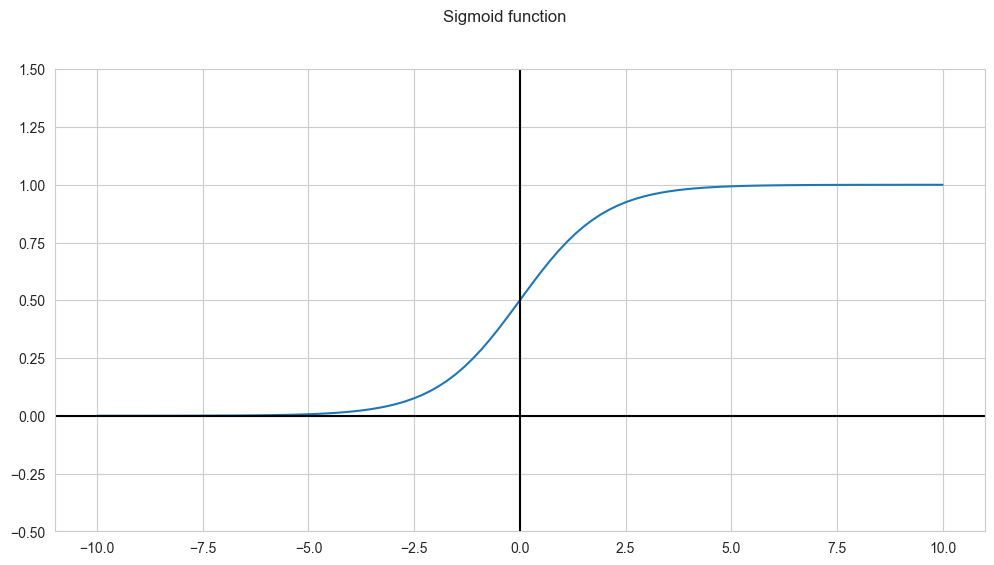

In [5]:
vals = np.linspace(-10, 10, num=100, dtype=np.float32)
activation = sigmoid(vals)


sns.set_style("whitegrid")

fig = plt.figure(figsize=(12, 6))
fig.suptitle('Sigmoid function')

plt.plot(vals, activation)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks()
plt.ylim([-0.5, 1.5])

plt.show()

In [6]:
def logic_gate(w1, w2, b):
    return lambda x1, x2: sigmoid(w1 * x1 + w2 * x2 + b)

def test(gate):
    for a, b in (0, 0), (0, 1), (1, 0), (1, 1):
        print("{}, {}: {}".format(a, b, np.round(gate(a, b))))

In [7]:
or_gate = logic_gate(20, 20, -10)
test(or_gate)

0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 1.0


## Student Exercise
Try to figure out what values for the neurons would make this function as an AND gate.

In [8]:

w1 =10
w2 =10
b =-10
and_gate = logic_gate(w1, w2, b)

test(and_gate)

0, 0: 0.0
0, 1: 0.0
1, 0: 0.0
1, 1: 1.0


## Student Exercise
Do the same for the NOR gate and the NAND gate.

### NOR (Not Or) Gate

<table>

<tr>
<th colspan="3">NOR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>0</td>
</tr>

</table>

In [9]:
# TO DO: Fill in the w1, w2, and b parameters such that the truth table matches
w1 =-10
w2 =-10
b =10
nor_gate = logic_gate(w1, w2, b)

test(nor_gate)

0, 0: 1.0
0, 1: 0.0
1, 0: 0.0
1, 1: 0.0


### NAND (Not And) Gate

<table>

<tr>
<th colspan="3">NAND gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>0</td>
</tr>

</table>

In [10]:
# TO DO: Fill in the w1, w2, and b parameters such that the truth table matches
w1 =-10
w2 =-10
b =20
nand_gate = logic_gate(w1, w2, b)

test(nand_gate)

0, 0: 1.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0


## Student Exercise: The limits of single neurons

If you've taken computer science courses, you may know that the XOR gates are the basis of computation. They can be used as so-called "half-adders", the foundation of being able to add numbers together. Here's the truth table for XOR:

### XOR (Exclusive Or) Gate

<table>

<tr>
<th colspan="3">XOR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>0</td>
</tr>

</table>

Now the question is, can you create a set of weights such that a single neuron can output this property?

It turns out that you cannot. Single neurons can't correlate inputs, so it's just confused. So individual neurons are out. Can we still use neurons to somehow form an XOR gate?

What if we tried something more complex:

Here, we've got the inputs going to two separate gates: the top neuron is an OR gate, and the bottom is a NAND gate. The output of these gates then get passed to another neuron, which is an AND gate. If you work out the outputs at each combination of input values, you'll see that this is an XOR gate!

In [11]:
# Make sure you have or_gate, nand_gate, and and_gate working from above!
def xor_gate(a, b):
    c = or_gate(a, b)
    d = nand_gate(a, b)
    return and_gate(c, d)
test(xor_gate)

0, 0: 1.0
0, 1: 1.0
1, 0: 1.0
1, 1: 1.0


#Utilizing Multi Layered Perceptrons to simulate logic gates

In [1]:
import numpy as np

# AND gate data
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd

# Build the model
model_and = Sequential([
    Dense(4, activation='relu', input_dim=2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_and.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_and.fit(X_and, y_and, epochs=500, verbose=0)
# Evaluate the model
loss_and, accuracy_and = model_and.evaluate(X_and, y_and)
print(f'AND Gate - Loss: {loss_and:.4f}, Accuracy: {accuracy_and:.4f}')

# Make predictions


predictions_and = model_and.predict(X_and)
rounded_predictions_and = np.round(predictions_and)

# Create a DataFrame for tabular display
results_df = pd.DataFrame(X_and, columns=['Input 1', 'Input 2'])
results_df['Actual Output'] = y_and
results_df['Predicted Output'] = rounded_predictions_and.flatten()

print("\nAND Gate - Predictions:")
print(results_df)


1/1 [==============================] - 0s 269ms/step - loss: 0.4565 - accuracy: 0.7500
AND Gate - Loss: 0.4565, Accuracy: 0.7500
1/1 [==============================] - 0s 148ms/step

AND Gate - Predictions:
   Input 1  Input 2  Actual Output  Predicted Output
0        0        0              0               0.0
1        0        1              0               0.0
2        1        0              0               0.0
3        1        1              1               0.0


In [2]:
# OR gate data
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])

# Build the model
model_or = Sequential([
    Dense(4, activation='relu', input_dim=2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_or.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_or.fit(X_or, y_or, epochs=1000, verbose=0)

# Evaluate the model
loss_or, accuracy_or = model_or.evaluate(X_or, y_or)
print(f'OR Gate - Loss: {loss_or:.4f}, Accuracy: {accuracy_or:.4f}')

# Make predictions
predictions_or = model_or.predict(X_or)
rounded_predictions_or = np.round(predictions_or)

# Create a DataFrame for tabular display
results_df_or = pd.DataFrame(X_or, columns=['Input 1', 'Input 2'])
results_df_or['Actual Output'] = y_or
results_df_or['Predicted Output'] = rounded_predictions_or.flatten()

print("\nOR Gate - Predictions:")
print(results_df_or)


1/1 [==============================] - 0s 159ms/step - loss: 0.2937 - accuracy: 0.7500
OR Gate - Loss: 0.2937, Accuracy: 0.7500
1/1 [==============================] - 0s 57ms/step

OR Gate - Predictions:
   Input 1  Input 2  Actual Output  Predicted Output
0        0        0              0               1.0
1        0        1              1               1.0
2        1        0              1               1.0
3        1        1              1               1.0


In [3]:
# NAND gate data
X_nand = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_nand = np.array([1, 1, 1, 0])

# Build the model
model_nand = Sequential([
    Dense(4, activation='relu', input_dim=2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_nand.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_nand.fit(X_nand, y_nand, epochs=500, verbose=0)

# Evaluate the model
loss_nand, accuracy_nand = model_nand.evaluate(X_nand, y_nand)
print(f'NAND Gate - Loss: {loss_nand:.4f}, Accuracy: {accuracy_nand:.4f}')

# Make predictions
predictions_nand = model_nand.predict(X_nand)
rounded_predictions_nand = np.round(predictions_nand)

# Create a DataFrame for tabular display
results_df_nand = pd.DataFrame(X_nand, columns=['Input 1', 'Input 2'])
results_df_nand['Actual Output'] = y_nand
results_df_nand['Predicted Output'] = rounded_predictions_nand.flatten()

print("\nNAND Gate - Predictions:")
print(results_df_nand)


1/1 [==============================] - 1s 793ms/step - loss: 0.3629 - accuracy: 0.7500
NAND Gate - Loss: 0.3629, Accuracy: 0.7500
1/1 [==============================] - 0s 59ms/step

NAND Gate - Predictions:
   Input 1  Input 2  Actual Output  Predicted Output
0        0        0              1               1.0
1        0        1              1               1.0
2        1        0              1               1.0
3        1        1              0               1.0


In [4]:
# XOR gate data
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

# Build the model
model_xor = Sequential([
    Dense(4, activation='relu', input_dim=2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_xor.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_xor.fit(X_xor, y_xor, epochs=1000, verbose=0)

# Evaluate the model
loss_xor, accuracy_xor = model_xor.evaluate(X_xor, y_xor)
print(f'XOR Gate - Loss: {loss_xor:.4f}, Accuracy: {accuracy_xor:.4f}')

# Make predictions
predictions_xor = model_xor.predict(X_xor)
rounded_predictions_xor = np.round(predictions_xor)

# Create a DataFrame for tabular display
results_df_xor = pd.DataFrame(X_xor, columns=['Input 1', 'Input 2'])
results_df_xor['Actual Output'] = y_xor
results_df_xor['Predicted Output'] = rounded_predictions_xor.flatten()

print("\nXOR Gate - Predictions:")
print(results_df_xor)


1/1 [==============================] - 0s 213ms/step - loss: 0.4321 - accuracy: 0.7500
XOR Gate - Loss: 0.4321, Accuracy: 0.7500
1/1 [==============================] - 0s 63ms/step

XOR Gate - Predictions:
   Input 1  Input 2  Actual Output  Predicted Output
0        0        0              0               0.0
1        0        1              1               0.0
2        1        0              1               1.0
3        1        1              0               0.0


In [5]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Function to build, train, and evaluate a model for a logic gate
def train_logic_gate(X, y, gate_name):
    model = Sequential([
        Dense(4, activation='relu', input_dim=2),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X, y, epochs=1000, verbose=0)

    # Evaluate the model
    loss, accuracy = model.evaluate(X, y)
    print(f'{gate_name} Gate - Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

    # Make predictions
    predictions = model.predict(X)
    rounded_predictions = np.round(predictions)

    # Create a DataFrame for tabular display
    results_df = pd.DataFrame(X, columns=['Input 1', 'Input 2'])
    results_df['Actual Output'] = y
    results_df['Predicted Output'] = rounded_predictions.flatten()

    print(f"\n{gate_name} Gate - Predictions:")
    print(results_df)

# AND gate data
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])
train_logic_gate(X_and, y_and, "AND")

# OR gate data
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])
train_logic_gate(X_or, y_or, "OR")

# NAND gate data
X_nand = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_nand = np.array([1, 1, 1, 0])
train_logic_gate(X_nand, y_nand, "NAND")

# XOR gate data
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])
train_logic_gate(X_xor, y_xor, "XOR")


1/1 [==============================] - 0s 134ms/step - loss: 0.2312 - accuracy: 1.0000
AND Gate - Loss: 0.2312, Accuracy: 1.0000
1/1 [==============================] - 0s 67ms/step

AND Gate - Predictions:
   Input 1  Input 2  Actual Output  Predicted Output
0        0        0              0               0.0
1        0        1              0               0.0
2        1        0              0               0.0
3        1        1              1               1.0
1/1 [==============================] - 0s 122ms/step - loss: 0.3768 - accuracy: 0.7500
OR Gate - Loss: 0.3768, Accuracy: 0.7500
1/1 [==============================] - 0s 51ms/step

OR Gate - Predictions:
   Input 1  Input 2  Actual Output  Predicted Output
0        0        0              0               1.0
1        0        1              1               1.0
2        1        0              1               1.0
3        1        1              1               1.0
1/1 [==============================] - 0s 121ms/step - loss:

## Feedforward Networks as Matrix Computations

We discussed previously how the feed-forward computation of a neural network can be thought of as matrix calculations and activation functions.  We will do some actual computations with matrices to see this in action.



## Exercise
Provided below are the following:

- Three weight matrices `W_1`, `W_2` and `W_3` representing the weights in each layer.  The convention for these matrices is that each $W_{i,j}$ gives the weight from neuron $i$ in the previous (left) layer to neuron $j$ in the next (right) layer.  
- A vector `x_in` representing a single input and a matrix `x_mat_in` representing 7 different inputs.
- Two functions: `soft_max_vec` and `soft_max_mat` which apply the soft_max function to a single vector, and row-wise to a matrix.

The goals for this exercise are:
1. For input `x_in` calculate the inputs and outputs to each layer (assuming sigmoid activations for the middle two layers and soft_max output for the final layer.
2. Write a function that does the entire neural network calculation for a single input
3. Write a function that does the entire neural network calculation for a matrix of inputs, where each row is a single input.
4. Test your functions on `x_in` and `x_mat_in`.

This illustrates what happens in a NN during one single forward pass. Roughly speaking, after this forward pass, it remains to compare the output of the network to the known truth values, compute the gradient of the loss function and adjust the weight matrices `W_1`, `W_2` and `W_3` accordingly, and iterate. Hopefully this process will result in better weight matrices and our loss will be smaller afterwards.

In [6]:
W_1 = np.array([[2,-1,1,4],[-1,2,-3,1],[3,-2,-1,5]])
W_2 = np.array([[3,1,-2,1],[-2,4,1,-4],[-1,-3,2,-5],[3,1,1,1]])
W_3 = np.array([[-1,3,-2],[1,-1,-3],[3,-2,2],[1,2,1]])
x_in = np.array([.5,.8,.2])
x_mat_in = np.array([[.5,.8,.2],[.1,.9,.6],[.2,.2,.3],[.6,.1,.9],[.5,.5,.4],[.9,.1,.9],[.1,.8,.7]])

def soft_max_vec(vec):
    return np.exp(vec)/(np.sum(np.exp(vec)))

def soft_max_mat(mat):
    return np.exp(mat)/(np.sum(np.exp(mat),axis=1).reshape(-1,1))

print('the matrix W_1\n')
print(W_1)
print('-'*30)
print('vector input x_in\n')
print(x_in)
print ('-'*30)
print('matrix input x_mat_in -- starts with the vector `x_in`\n')
print(x_mat_in)

the matrix W_1

[[ 2 -1  1  4]
 [-1  2 -3  1]
 [ 3 -2 -1  5]]
------------------------------
vector input x_in

[0.5 0.8 0.2]
------------------------------
matrix input x_mat_in -- starts with the vector `x_in`

[[0.5 0.8 0.2]
 [0.1 0.9 0.6]
 [0.2 0.2 0.3]
 [0.6 0.1 0.9]
 [0.5 0.5 0.4]
 [0.9 0.1 0.9]
 [0.1 0.8 0.7]]


In [ ]:
## Student to do the calculations below

In [7]:
z_2 = np.dot(x_in,W_1)
z_2

array([ 0.8,  0.7, -2.1,  3.8])

In [10]:
a_2 = sigmoid(z_2)
a_2

array([0.68997448, 0.66818777, 0.10909682, 0.97811873])

In [11]:
z_3 = np.dot(a_2,W_2)
z_3

array([ 3.55880727,  4.01355384,  0.48455118, -1.55014198])

In [12]:
a_3 = sigmoid(z_3)
a_3

array([0.97231549, 0.98225163, 0.61882199, 0.17506576])

In [13]:
z_4 = np.dot(a_3,W_3)
z_4

array([ 2.04146788,  1.04718238, -3.47867612])

In [14]:
def soft_max_vec(vec):
    return np.exp(vec)/(np.sum(np.exp(vec)))

def soft_max_mat(mat):
    return np.exp(mat)/(np.sum(np.exp(mat),axis=1).reshape(-1,1))



In [15]:
y_out = soft_max_vec(z_4)
y_out

array([0.72780576, 0.26927918, 0.00291506])

In [16]:
## A one-line function to do the entire neural net computation

def nn_comp_vec(x):
    return soft_max_vec(sigmoid(sigmoid(np.dot(x,W_1)).dot(W_2)).dot(W_3))

def nn_comp_mat(x):
    return soft_max_mat(sigmoid(sigmoid(np.dot(x,W_1)).dot(W_2)).dot(W_3))

In [17]:
nn_comp_vec(x_in)

array([0.72780576, 0.26927918, 0.00291506])

In [18]:
nn_comp_mat(x_mat_in)

array([[0.72780576, 0.26927918, 0.00291506],
       [0.62054212, 0.37682531, 0.00263257],
       [0.69267581, 0.30361576, 0.00370844],
       [0.36618794, 0.63016955, 0.00364252],
       [0.57199769, 0.4251982 , 0.00280411],
       [0.38373781, 0.61163804, 0.00462415],
       [0.52510443, 0.4725011 , 0.00239447]])